# Overlapping Groups Statistical Analysis
## Computational Statistics Assignment

This notebook implements a solution for the overlapping groups assignment, demonstrating concepts from Maximum Likelihood Estimation (MLE) and Gaussian Mixture Models (GMM).

## 1. Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Set random seed for reproducibility
np.random.seed(42)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Point Distribution Design

We need to create three overlapping groups with the following constraints:
- Each group has exactly 2,000 points
- Approximately 1/3 of each group (≈667 points) must be in the central intersection (A ∩ B ∩ C)

In [2]:
# Point distribution across regions
distribution = {
    'A_only': 700,
    'B_only': 733,
    'C_only': 700,
    'AB_only': 300,
    'AC_only': 333,
    'BC_only': 300,
    'ABC': 667
}

# Display distribution
df_dist = pd.DataFrame(list(distribution.items()), columns=['Region', 'Points'])
print("Point Distribution:")
print(df_dist.to_string(index=False))
print(f"\nTotal Unique Points: {sum(distribution.values())}")

# Verify group totals
group_A_total = distribution['A_only'] + distribution['AB_only'] + distribution['AC_only'] + distribution['ABC']
group_B_total = distribution['B_only'] + distribution['AB_only'] + distribution['BC_only'] + distribution['ABC']
group_C_total = distribution['C_only'] + distribution['AC_only'] + distribution['BC_only'] + distribution['ABC']

print(f"\nGroup Totals:")
print(f"  Group A: {group_A_total} points")
print(f"  Group B: {group_B_total} points")
print(f"  Group C: {group_C_total} points")
print(f"\nABC Intersection: {distribution['ABC']} points ({distribution['ABC']/2000*100:.2f}% of each group)")

Point Distribution:
 Region  Points
 A_only     700
 B_only     733
 C_only     700
AB_only     300
AC_only     333
BC_only     300
    ABC     667

Total Unique Points: 3733

Group Totals:
  Group A: 2000 points
  Group B: 2000 points
  Group C: 2000 points

ABC Intersection: 667 points (33.35% of each group)


## 3. Data Generation

Each region is assigned values from different Gaussian distributions. Overlapping regions have intermediate characteristics.

In [3]:
# Generate data with different Gaussian distributions for each region
data = {
    'A_only': np.random.normal(loc=10, scale=2, size=distribution['A_only']),
    'B_only': np.random.normal(loc=15, scale=2.5, size=distribution['B_only']),
    'C_only': np.random.normal(loc=20, scale=3, size=distribution['C_only']),
    'AB_only': np.random.normal(loc=12.5, scale=2, size=distribution['AB_only']),
    'AC_only': np.random.normal(loc=15, scale=2.5, size=distribution['AC_only']),
    'BC_only': np.random.normal(loc=17.5, scale=2.5, size=distribution['BC_only']),
    'ABC': np.random.normal(loc=15, scale=2, size=distribution['ABC'])
}

print("✓ Data generated for all regions")
print("\nGenerative Parameters:")
print("  A only:     N(μ=10,   σ²=4)")
print("  B only:     N(μ=15,   σ²=6.25)")
print("  C only:     N(μ=20,   σ²=9)")
print("  A ∩ B:      N(μ=12.5, σ²=4)")
print("  A ∩ C:      N(μ=15,   σ²=6.25)")
print("  B ∩ C:      N(μ=17.5, σ²=6.25)")
print("  A ∩ B ∩ C:  N(μ=15,   σ²=4)")

✓ Data generated for all regions

Generative Parameters:
  A only:     N(μ=10,   σ²=4)
  B only:     N(μ=15,   σ²=6.25)
  C only:     N(μ=20,   σ²=9)
  A ∩ B:      N(μ=12.5, σ²=4)
  A ∩ C:      N(μ=15,   σ²=6.25)
  B ∩ C:      N(μ=17.5, σ²=6.25)
  A ∩ B ∩ C:  N(μ=15,   σ²=4)


## 4. Combine Data into Groups

Combine the regional data into three groups based on set membership.

In [4]:
# Combine data for each group
group_A = np.concatenate([data['A_only'], data['AB_only'], data['AC_only'], data['ABC']])
group_B = np.concatenate([data['B_only'], data['AB_only'], data['BC_only'], data['ABC']])
group_C = np.concatenate([data['C_only'], data['AC_only'], data['BC_only'], data['ABC']])

print(f"✓ Groups combined")
print(f"  Group A size: {len(group_A)}")
print(f"  Group B size: {len(group_B)}")
print(f"  Group C size: {len(group_C)}")

✓ Groups combined
  Group A size: 2000
  Group B size: 2000
  Group C size: 2000


## 5. Statistical Analysis (MLE Estimators)

Calculate Maximum Likelihood Estimators for mean and variance:

**Mean estimator:**
$$\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

**Variance estimator (unbiased):**
$$\hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \hat{\mu})^2$$

In [5]:
# Calculate statistics for each group
stats = {
    'Group A': {
        'n': len(group_A),
        'mean': np.mean(group_A),
        'variance': np.var(group_A, ddof=1),
        'std': np.std(group_A, ddof=1)
    },
    'Group B': {
        'n': len(group_B),
        'mean': np.mean(group_B),
        'variance': np.var(group_B, ddof=1),
        'std': np.std(group_B, ddof=1)
    },
    'Group C': {
        'n': len(group_C),
        'mean': np.mean(group_C),
        'variance': np.var(group_C, ddof=1),
        'std': np.std(group_C, ddof=1)
    }
}

# Display statistics
stats_df = pd.DataFrame(stats).T
print("\n" + "="*60)
print("GROUP STATISTICS (MLE Estimators)")
print("="*60)
print(stats_df.to_string())

# Save to CSV
stats_df.to_csv('group_statistics.csv')
print("\n✓ Statistics saved to 'group_statistics.csv'")


GROUP STATISTICS (MLE Estimators)
              n       mean   variance       std
Group A  2000.0  12.931276   9.856295  3.139474
Group B  2000.0  15.063923   6.918972  2.630394
Group C  2000.0  17.185822  11.581325  3.403135

✓ Statistics saved to 'group_statistics.csv'


## 6. Visualization: Venn Diagram

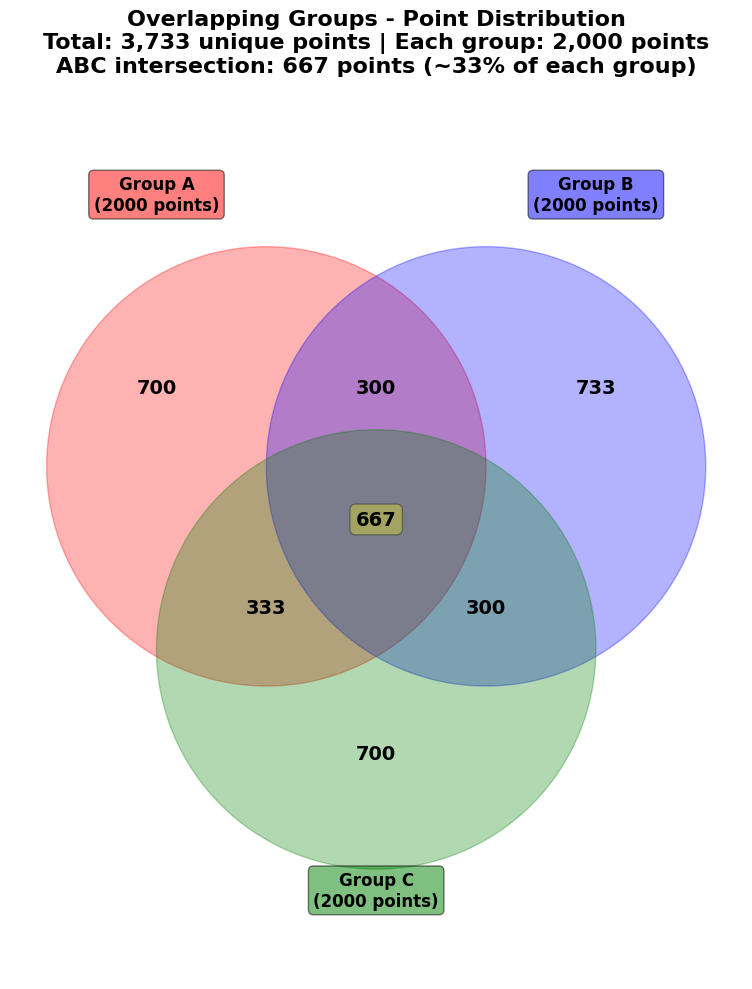

✓ Venn diagram saved to 'venn_diagram.png'


In [6]:
# Create Venn diagram
fig, ax = plt.subplots(figsize=(12, 10))

# Draw three circles
circle_A = Circle((0.35, 0.5), 0.3, color='red', alpha=0.3, label='Group A')
circle_B = Circle((0.65, 0.5), 0.3, color='blue', alpha=0.3, label='Group B')
circle_C = Circle((0.5, 0.25), 0.3, color='green', alpha=0.3, label='Group C')

ax.add_patch(circle_A)
ax.add_patch(circle_B)
ax.add_patch(circle_C)

# Add labels for regions
ax.text(0.20, 0.60, '700', fontsize=14, fontweight='bold', ha='center')
ax.text(0.80, 0.60, '733', fontsize=14, fontweight='bold', ha='center')
ax.text(0.50, 0.10, '700', fontsize=14, fontweight='bold', ha='center')
ax.text(0.50, 0.60, '300', fontsize=14, fontweight='bold', ha='center')
ax.text(0.35, 0.30, '333', fontsize=14, fontweight='bold', ha='center')
ax.text(0.65, 0.30, '300', fontsize=14, fontweight='bold', ha='center')
ax.text(0.50, 0.42, '667', fontsize=14, fontweight='bold', ha='center', 
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

# Add group labels
ax.text(0.20, 0.85, 'Group A\n(2000 points)', fontsize=12, fontweight='bold',
        ha='center', bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))
ax.text(0.80, 0.85, 'Group B\n(2000 points)', fontsize=12, fontweight='bold',
        ha='center', bbox=dict(boxstyle='round', facecolor='blue', alpha=0.5))
ax.text(0.50, -0.10, 'Group C\n(2000 points)', fontsize=12, fontweight='bold',
        ha='center', bbox=dict(boxstyle='round', facecolor='green', alpha=0.5))

ax.set_xlim(0, 1)
ax.set_ylim(-0.2, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Overlapping Groups - Point Distribution\nTotal: 3,733 unique points | Each group: 2,000 points\nABC intersection: 667 points (~33% of each group)',
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('venn_diagram.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Venn diagram saved to 'venn_diagram.png'")

## 7. Visualization: Distribution Histograms

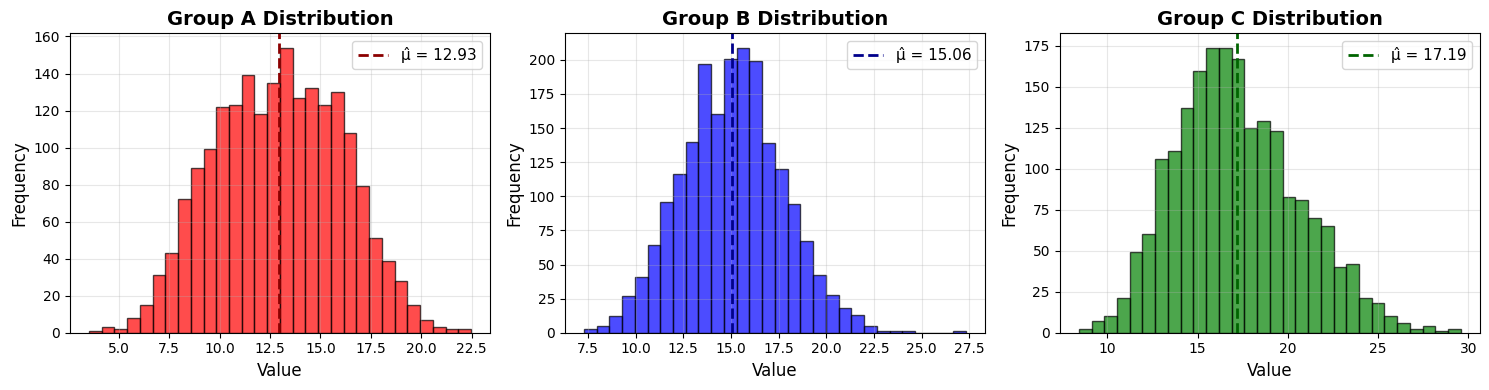

✓ Distribution histograms saved to 'distributions.png'


In [7]:
# Create distribution histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Group A
axes[0].hist(group_A, bins=30, color='red', alpha=0.7, edgecolor='black')
axes[0].axvline(stats['Group A']['mean'], color='darkred', linestyle='--',
                linewidth=2, label=f"μ̂ = {stats['Group A']['mean']:.2f}")
axes[0].set_title('Group A Distribution', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Group B
axes[1].hist(group_B, bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[1].axvline(stats['Group B']['mean'], color='darkblue', linestyle='--',
                linewidth=2, label=f"μ̂ = {stats['Group B']['mean']:.2f}")
axes[1].set_title('Group B Distribution', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Value', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

# Group C
axes[2].hist(group_C, bins=30, color='green', alpha=0.7, edgecolor='black')
axes[2].axvline(stats['Group C']['mean'], color='darkgreen', linestyle='--',
                linewidth=2, label=f"μ̂ = {stats['Group C']['mean']:.2f}")
axes[2].set_title('Group C Distribution', fontweight='bold', fontsize=14)
axes[2].set_xlabel('Value', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].legend(fontsize=11)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Distribution histograms saved to 'distributions.png'")

## 8. Connection to MLE and GMM

### Maximum Likelihood Estimation (MLE)

For each group, we computed MLE estimators assuming Gaussian distributions:

- **Unbiased**: Using Bessel's correction (n-1) for variance
- **Consistent**: Converge to true parameters as n → ∞
- **Efficient**: Achieve minimum variance among unbiased estimators

### Gaussian Mixture Models (GMM)

This assignment structure mirrors a 3-component GMM:

1. **Components**: Three Gaussian distributions (Groups A, B, C)
2. **Mixing coefficients**: Equal weights (π_A = π_B = π_C = 1/3)
3. **Overlapping memberships**: Points in intersections have membership in multiple components

In a full GMM framework:
- **E-step**: Compute responsibilities (posterior probabilities) for each point
- **M-step**: Update μ̂, σ̂², and π using weighted MLE

Our structure represents a simplified case with **known memberships** (hard assignments), where parameters are directly identifiable via MLE.

### Key Insight: The 1/3 Constraint

Having **33% of each group in the central intersection** demonstrates:
- **High mixture complexity**: Significant overlap between all components
- **Parameter dependencies**: Shared points influence all three group statistics
- **Identifiability challenges**: In unsupervised GMM, this level of overlap makes component separation difficult

## 9. Save Data for Reproducibility

In [8]:
# Save raw data
np.savez('group_data.npz',
         group_A=group_A,
         group_B=group_B,
         group_C=group_C,
         distribution=distribution)

print("✓ Data saved to 'group_data.npz'")
print("\nAll files generated:")
print("  - group_statistics.csv")
print("  - group_data.npz")
print("  - venn_diagram.png")
print("  - distributions.png")

✓ Data saved to 'group_data.npz'

All files generated:
  - group_statistics.csv
  - group_data.npz
  - venn_diagram.png
  - distributions.png


## 10. Summary and Verification

In [9]:
print("="*60)
print("CONSTRAINT VERIFICATION")
print("="*60)
print(f"✓ Group A: {len(group_A)} points (expected: 2000)")
print(f"✓ Group B: {len(group_B)} points (expected: 2000)")
print(f"✓ Group C: {len(group_C)} points (expected: 2000)")
print(f"✓ Total unique points: {sum(distribution.values())} (3,733)")
print(f"✓ ABC intersection: {distribution['ABC']} points ({distribution['ABC']/2000*100:.2f}% of each group)")
print(f"✓ All groups overlap with each other")
print("\nAll constraints satisfied! ✓")

CONSTRAINT VERIFICATION
✓ Group A: 2000 points (expected: 2000)
✓ Group B: 2000 points (expected: 2000)
✓ Group C: 2000 points (expected: 2000)
✓ Total unique points: 3733 (3,733)
✓ ABC intersection: 667 points (33.35% of each group)
✓ All groups overlap with each other

All constraints satisfied! ✓
